# HK Model (unmodified)

## $d=1$

### Phase Diagram

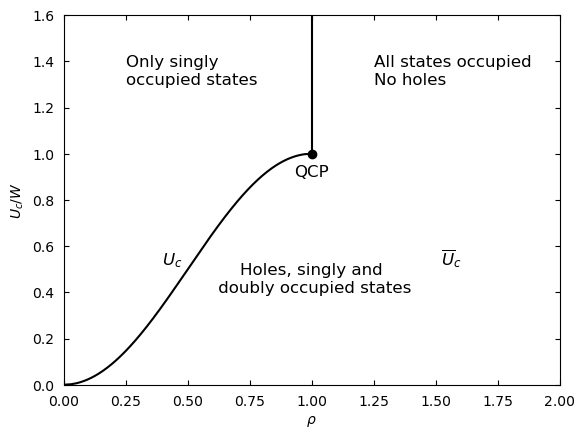

In [2]:
from HKLnumerics import PhaseDiagram_1D, PlotFunctions
import numpy as np

rho_arr, Uc_arr = PhaseDiagram_1D.phase_diagram_hk(500)

Uc_arr_norm = Uc_arr / np.max(Uc_arr)

PlotFunctions.plot_phase_diagram(rho_arr, Uc_arr_norm, r'$\rho$', r'$U_c/W$', 1.6)

## $d=2$

In [1]:
from HKLnumerics import HK_2D, PlotFunctions
import numpy as np

str_rho = r'$\rho$'
str_mu = r'$\mu$'

In [6]:
U_one_2d = 12

mu_2d_U_one = HK_2D.create_mu_array(100, U_one_2d)

rho_2d_U_one = HK_2D.create_rho_array(mu_2d_U_one, U_one_2d)

Progress: 99.0%                    

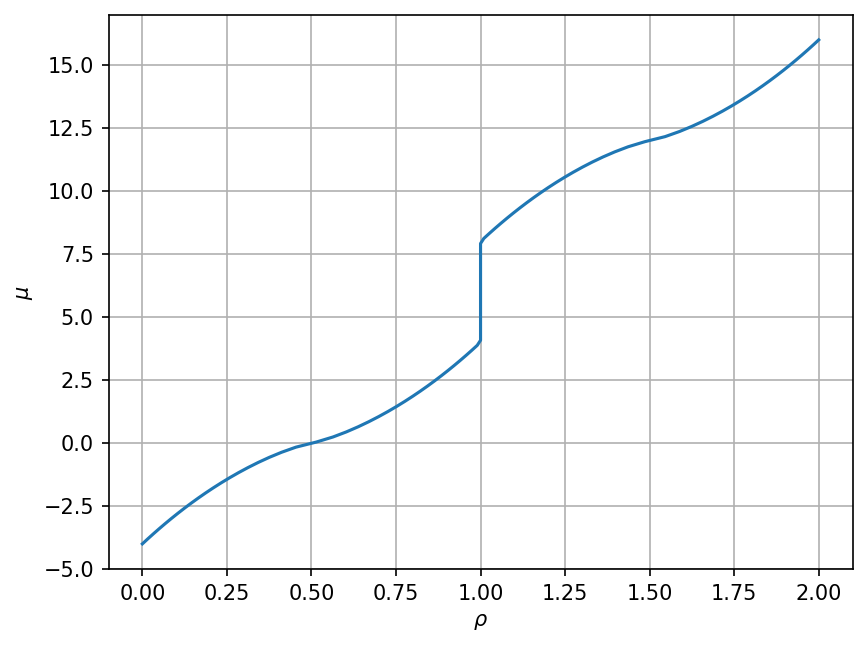

In [7]:
PlotFunctions.one_plot(rho_2d_U_one, mu_2d_U_one, str_rho, str_mu)